<a href="https://colab.research.google.com/github/Sajeenafiza/machine-dt/blob/main/machine_downtime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mstats
from sklearn.preprocessing import LabelEncoder

In [ ]:
# loading the data
df=pd.read_csv('/content/Machine Downtime.csv')

In [ ]:
# first 5 rows of the dataset
df.head()

Date            Machine_ID Assembly_Line_No  Hydraulic_Pressure(bar)  \
0  31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1                    71.04   
1  31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1                   125.33   
2  31-12-2021  Makino-L3-Unit1-2015     Shopfloor-L3                    71.12   
3  31-05-2022  Makino-L2-Unit1-2015     Shopfloor-L2                   139.34   
4  31-03-2022  Makino-L1-Unit1-2013     Shopfloor-L1                    60.51   

   Coolant_Pressure(bar)  Air_System_Pressure(bar)  Coolant_Temperature  \
0               6.933725                  6.284965                 25.6   
1               4.936892                  6.196733                 35.3   
2               6.839413                  6.655448                 13.1   
3               4.574382                  6.560394                 24.4   
4               6.893182                  6.141238                  4.1   

   Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Temperature(°C)  \
0                           46.0                             33.4   
1                           47.4                             34.6   
2                           40.7                             33.0   
3                           44.2                             40.6   
4                           47.3                             31.4   

   Spindle_Vibration(µm)  Tool_Vibration(µm)  Spindle_Speed(RPM)  \
0                  1.291              26.492             25892.0   
1                  1.382              25.274             19856.0   
2                  1.319              30.608             19851.0   
3                  0.618              30.791             18461.0   
4                  0.983              25.516             26526.0   

   Voltage(volts)  Torque(Nm)  Cutting(kN)         Downtime  
0           335.0   24.055326         3.58  Machine_Failure  
1           368.0   14.202890         2.68  Machine_Failure  
2           325.0   24.049267         3.55  Machine_Failure  
3           360.0   25.860029         3.55  Machine_Failure  
4           354.0   25.515874         3.55  Machine_Failure

In [ ]:
# displaying all the non null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(°C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(°C)  2493 non-null   float64
 9   Spindle_Vibration(µm)            2489 non-null   float64
 10  Tool_Vibration(µm)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [ ]:
# displaying the mean, std,min, max and percentiles
df.describe()

Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
count              2490.000000            2481.000000   
mean                101.409084               4.947058   
std                  30.289301               0.997357   
min                 -14.326454               0.325000   
25%                  76.355000               4.462464   
50%                  96.763486               4.939960   
75%                 126.415727               5.518401   
max                 191.000000              11.350000   

       Air_System_Pressure(bar)  Coolant_Temperature  \
count               2483.000000          2488.000000   
mean                   6.499275            18.559887   
std                    0.407279             8.554480   
min                    5.063480             4.100000   
25%                    6.217987            10.400000   
50%                    6.505191            21.200000   
75%                    6.780550            25.600000   
max                    7.973992            98.200000   

       Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Temperature(°C)  \
count                    2484.000000                      2493.000000   
mean                       47.618317                        35.063698   
std                         3.768674                         3.764823   
min                        35.200000                        22.600000   
25%                        45.100000                        32.500000   
50%                        47.700000                        35.100000   
75%                        50.100000                        37.600000   
max                        61.400000                        49.500000   

       Spindle_Vibration(µm)  Tool_Vibration(µm)  Spindle_Speed(RPM)  \
count            2489.000000         2489.000000         2494.000000   
mean                1.009334           25.411975        20274.792302   
std                 0.342898            6.437142         3852.660056   
min                -0.461000            2.161000            0.000000   
25%                 0.777000           21.089000        17919.000000   
50%                 1.008000           25.455000        20137.500000   
75%                 1.236000           29.790000        22501.750000   
max                 2.000000           45.726000        27957.000000   

       Voltage(volts)   Torque(Nm)  Cutting(kN)  
count     2494.000000  2479.000000  2493.000000  
mean       348.996792    25.234968     2.782551  
std         45.376024     6.138564     0.616688  
min        202.000000     0.000000     1.800000  
25%        319.000000    21.666115     2.250000  
50%        349.000000    24.647736     2.780000  
75%        380.000000    30.514008     3.270000  
max        479.000000    55.552400     3.930000

In [ ]:
# creating the numeric columns
numeric_columns=df.select_dtypes(include=['int64','float64']).columns

In [ ]:
# calculating the mode for numeric columns
print("Mode for the numeric columns:")
df[numeric_columns].mode()

Mode for the numeric columns:


Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  Air_System_Pressure(bar)  \
0                 88.279134               4.566854                  5.628717   
1                 89.458747               4.842521                  5.928643   
2                 90.458747               5.567857                  5.955235   
3                       NaN               5.918357                  6.011483   
4                       NaN               6.560332                  6.167549   
5                       NaN               6.839413                  6.430073   
6                       NaN               6.863944                  6.668245   
7                       NaN               6.893182                  6.753560   
8                       NaN                    NaN                  6.836188   
9                       NaN                    NaN                  6.875058   
10                      NaN                    NaN                  6.940606   

    Coolant_Temperature  Hydraulic_Oil_Temperature(°C)  \
0                  26.4                           47.5   
1                   NaN                           48.0   
2                   NaN                           50.0   
3                   NaN                            NaN   
4                   NaN                            NaN   
5                   NaN                            NaN   
6                   NaN                            NaN   
7                   NaN                            NaN   
8                   NaN                            NaN   
9                   NaN                            NaN   
10                  NaN                            NaN   

    Spindle_Bearing_Temperature(°C)  Spindle_Vibration(µm)  \
0                              34.6                  1.231   
1                               NaN                    NaN   
2                               NaN                    NaN   
3                               NaN                    NaN   
4                               NaN                    NaN   
5                               NaN                    NaN   
6                               NaN                    NaN   
7                               NaN                    NaN   
8                               NaN                    NaN   
9                               NaN                    NaN   
10                              NaN                    NaN   

    Tool_Vibration(µm)  Spindle_Speed(RPM)  Voltage(volts)  Torque(Nm)  \
0               26.736             17726.0           337.0   35.580334   
1               30.585                 NaN             NaN         NaN   
2                  NaN                 NaN             NaN         NaN   
3                  NaN                 NaN             NaN         NaN   
4                  NaN                 NaN             NaN         NaN   
5                  NaN                 NaN             NaN         NaN   
6                  NaN                 NaN             NaN         NaN   
7                  NaN                 NaN             NaN         NaN   
8                  NaN                 NaN             NaN         NaN   
9                  NaN                 NaN             NaN         NaN   
10                 NaN                 NaN             NaN         NaN   

    Cutting(kN)  
0          3.55  
1          3.67  
2           NaN  
3           NaN  
4           NaN  
5           NaN  
6           NaN  
7           NaN  
8           NaN  
9           NaN  
10          NaN

In [ ]:
# calculating the median for numeric columns
print("Median for the numeric columns:")
df[numeric_columns].median()

Median for the numeric columns:


Hydraulic_Pressure(bar)               96.763486
Coolant_Pressure(bar)                  4.939960
Air_System_Pressure(bar)               6.505191
Coolant_Temperature                   21.200000
Hydraulic_Oil_Temperature(°C)         47.700000
Spindle_Bearing_Temperature(°C)       35.100000
Spindle_Vibration(µm)                  1.008000
Tool_Vibration(µm)                    25.455000
Spindle_Speed(RPM)                 20137.500000
Voltage(volts)                       349.000000
Torque(Nm)                            24.647736
Cutting(kN)                            2.780000
dtype: float64

In [ ]:
# calculating the variance
print("Variance:")
df[numeric_columns].var()

Variance:


Hydraulic_Pressure(bar)            9.174417e+02
Coolant_Pressure(bar)              9.947213e-01
Air_System_Pressure(bar)           1.658765e-01
Coolant_Temperature                7.317912e+01
Hydraulic_Oil_Temperature(°C)      1.420291e+01
Spindle_Bearing_Temperature(°C)    1.417389e+01
Spindle_Vibration(µm)              1.175791e-01
Tool_Vibration(µm)                 4.143679e+01
Spindle_Speed(RPM)                 1.484299e+07
Voltage(volts)                     2.058984e+03
Torque(Nm)                         3.768196e+01
Cutting(kN)                        3.803044e-01
dtype: float64

In [ ]:
# calculating the skewness
print("Skewness:")
df[numeric_columns].skew()

Skewness:


Hydraulic_Pressure(bar)            0.197076
Coolant_Pressure(bar)              0.147081
Air_System_Pressure(bar)          -0.052899
Coolant_Temperature                0.108301
Hydraulic_Oil_Temperature(°C)     -0.002291
Spindle_Bearing_Temperature(°C)   -0.035942
Spindle_Vibration(µm)              0.001532
Tool_Vibration(µm)                -0.061005
Spindle_Speed(RPM)                -0.172475
Voltage(volts)                    -0.028658
Torque(Nm)                         0.030578
Cutting(kN)                        0.113963
dtype: float64

In [ ]:
# calculating the kurtosis
print("Kurtosis:")
df[numeric_columns].kurtosis()

Kurtosis:


Hydraulic_Pressure(bar)           -0.920292
Coolant_Pressure(bar)              1.169455
Air_System_Pressure(bar)          -0.001578
Coolant_Temperature                1.564639
Hydraulic_Oil_Temperature(°C)      0.038164
Spindle_Bearing_Temperature(°C)   -0.043862
Spindle_Vibration(µm)             -0.018718
Tool_Vibration(µm)                 0.006451
Spindle_Speed(RPM)                 1.344769
Voltage(volts)                    -0.090328
Torque(Nm)                        -0.465628
Cutting(kN)                       -1.087171
dtype: float64

Observations:
 Negative values for kutosis and skewness for some features indicate that some outliers are present.Some other values are close to zero indicate that they are normally distributed.

##Univariate

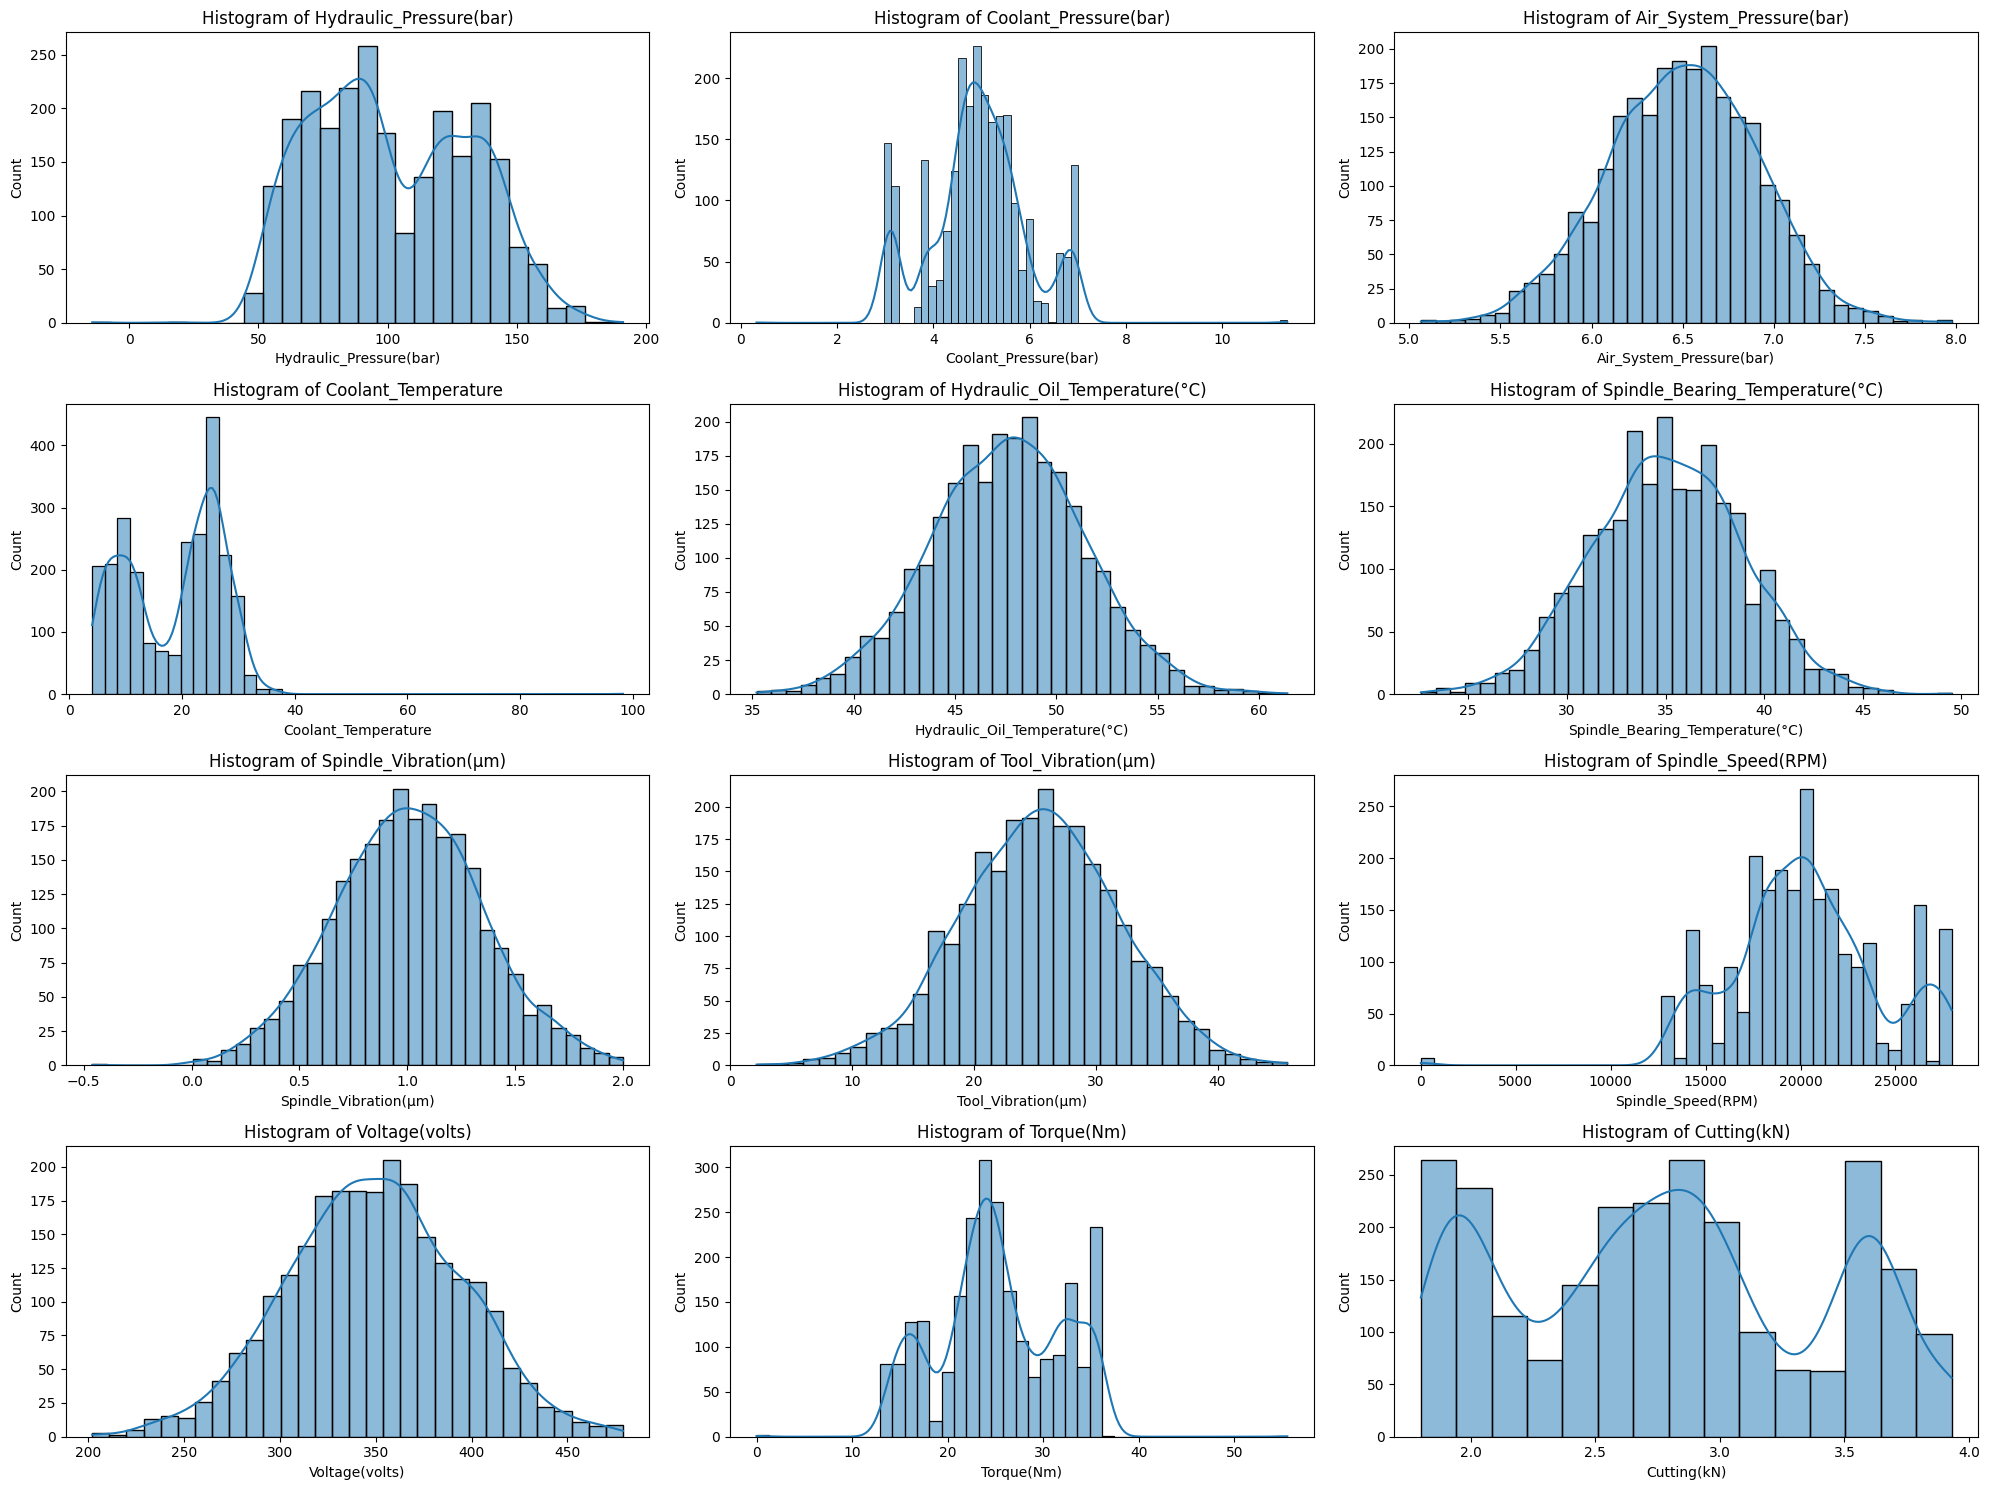

In [ ]:
# plotting the histogram for all numerical columns
plt.figure(figsize=(20, 15))
for col in df[numeric_columns]:
    plt.subplot(4, 3, df[numeric_columns].columns.get_loc(col) + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
plt.show()

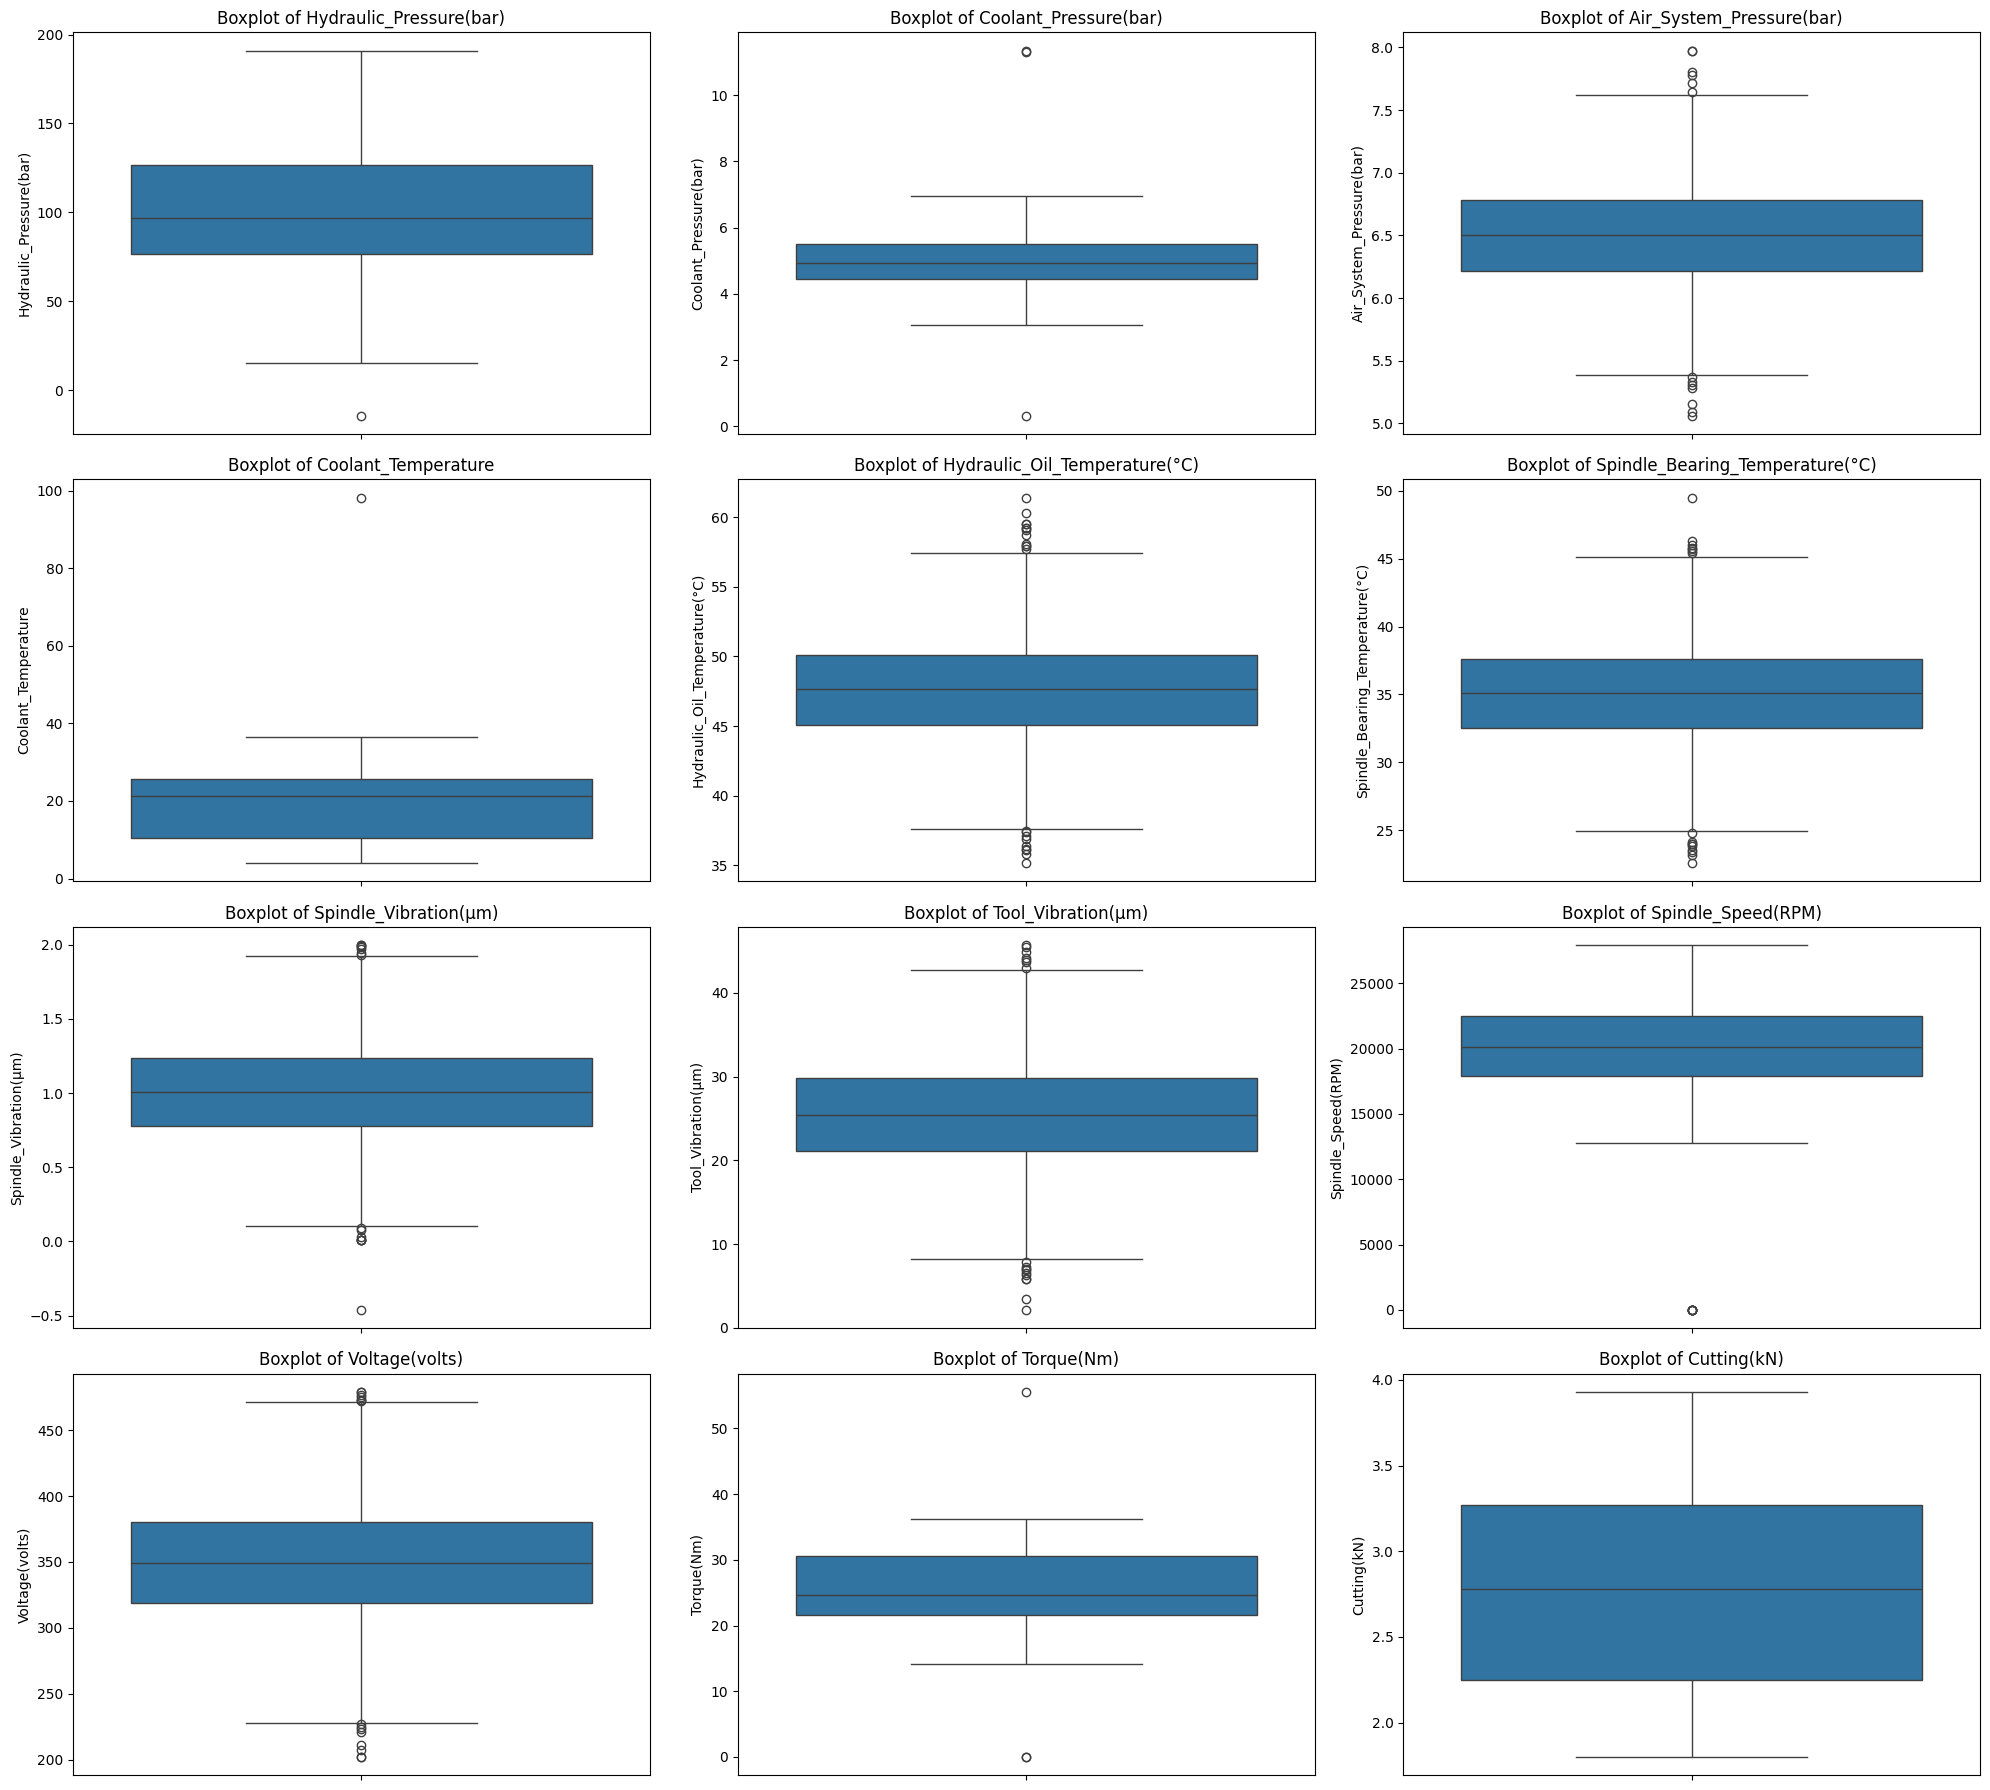

In [ ]:
# plotting the histogram for all numerical columns
plt.figure(figsize=(20, 18))
for col in df[numeric_columns]:
    plt.subplot(4, 3, df[numeric_columns].columns.get_loc(col) + 1)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

Observations:
In the histogram the columns,the spindle speed and coolant temperature are skewed.From the box plot we can see that all the columns except cutting have the presence of outliers.


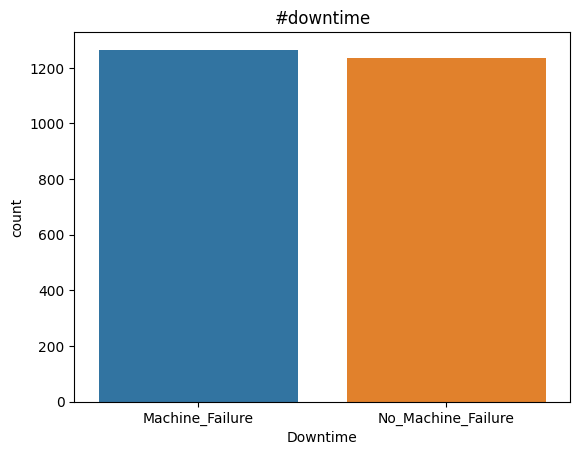

In [ ]:
# countplot for the column Downtime
sns.countplot(x=df['Downtime'],hue=df['Downtime'])
plt.title('#downtime')
plt.show()

Observations:
From the count plot it is clear that the dataset is balanced.

##Bivariate

<function matplotlib.pyplot.show(close=None, block=None)>

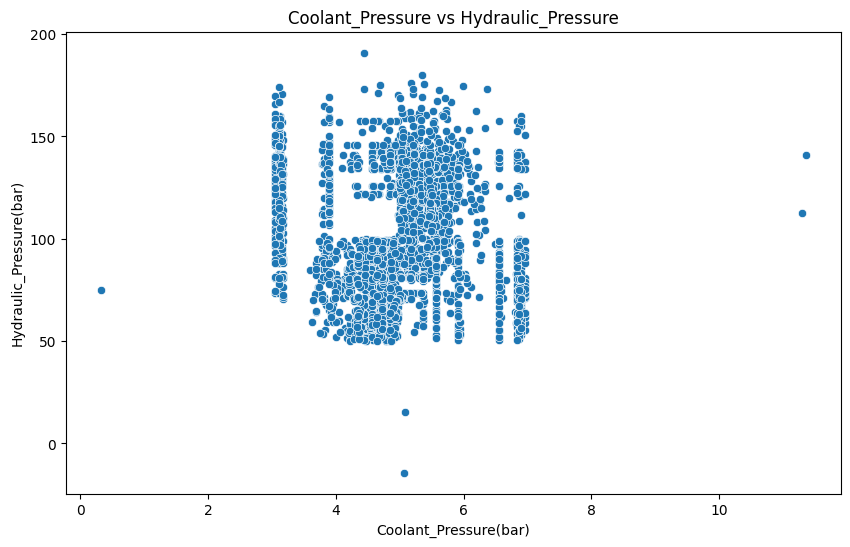

In [ ]:
# scatterplot for Coolant_Pressure vs Hydraulic_Pressure
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Coolant_Pressure(bar)'],y=df['Hydraulic_Pressure(bar)'])
plt.title('Coolant_Pressure vs Hydraulic_Pressure')
plt.xlabel('Coolant_Pressure(bar)')
plt.ylabel('Hydraulic_Pressure(bar)')
plt.show

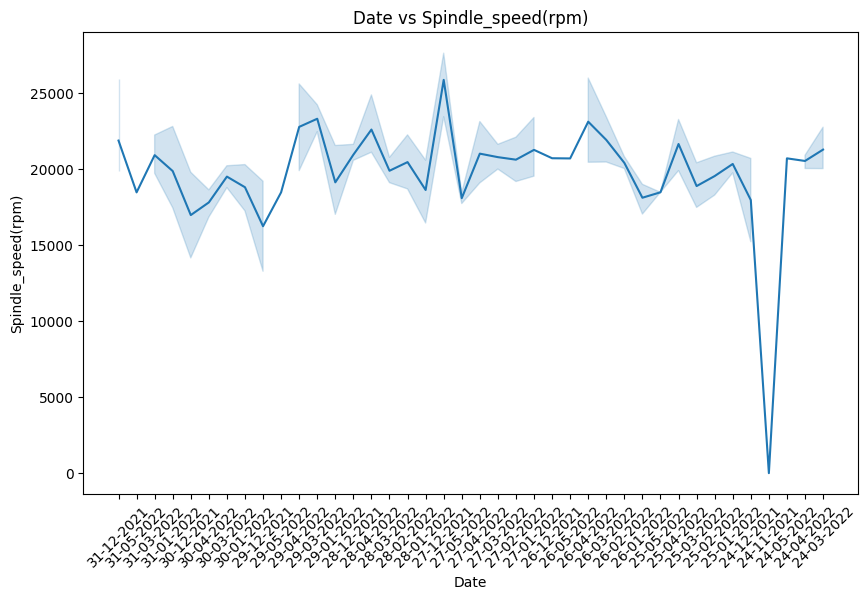

In [ ]:
# Line plot for Spindle speed for the time duration
plt.figure(figsize=(10,6))
# sns.lineplot(x=df['Date'],y=df['Spindle_Speed(RPM)'])
sns.lineplot(x='Date',y='Spindle_Speed(RPM)',data=df.head(500))
plt.title('Date vs Spindle_speed(rpm)')
plt.xlabel('Date')
plt.ylabel('Spindle_speed(rpm)')
plt.xticks(rotation=45)
plt.show()


##Multivariate

In [ ]:
# using the label encoder
label_encoder = LabelEncoder()
df['Downtime'] = label_encoder.fit_transform(df['Downtime'])

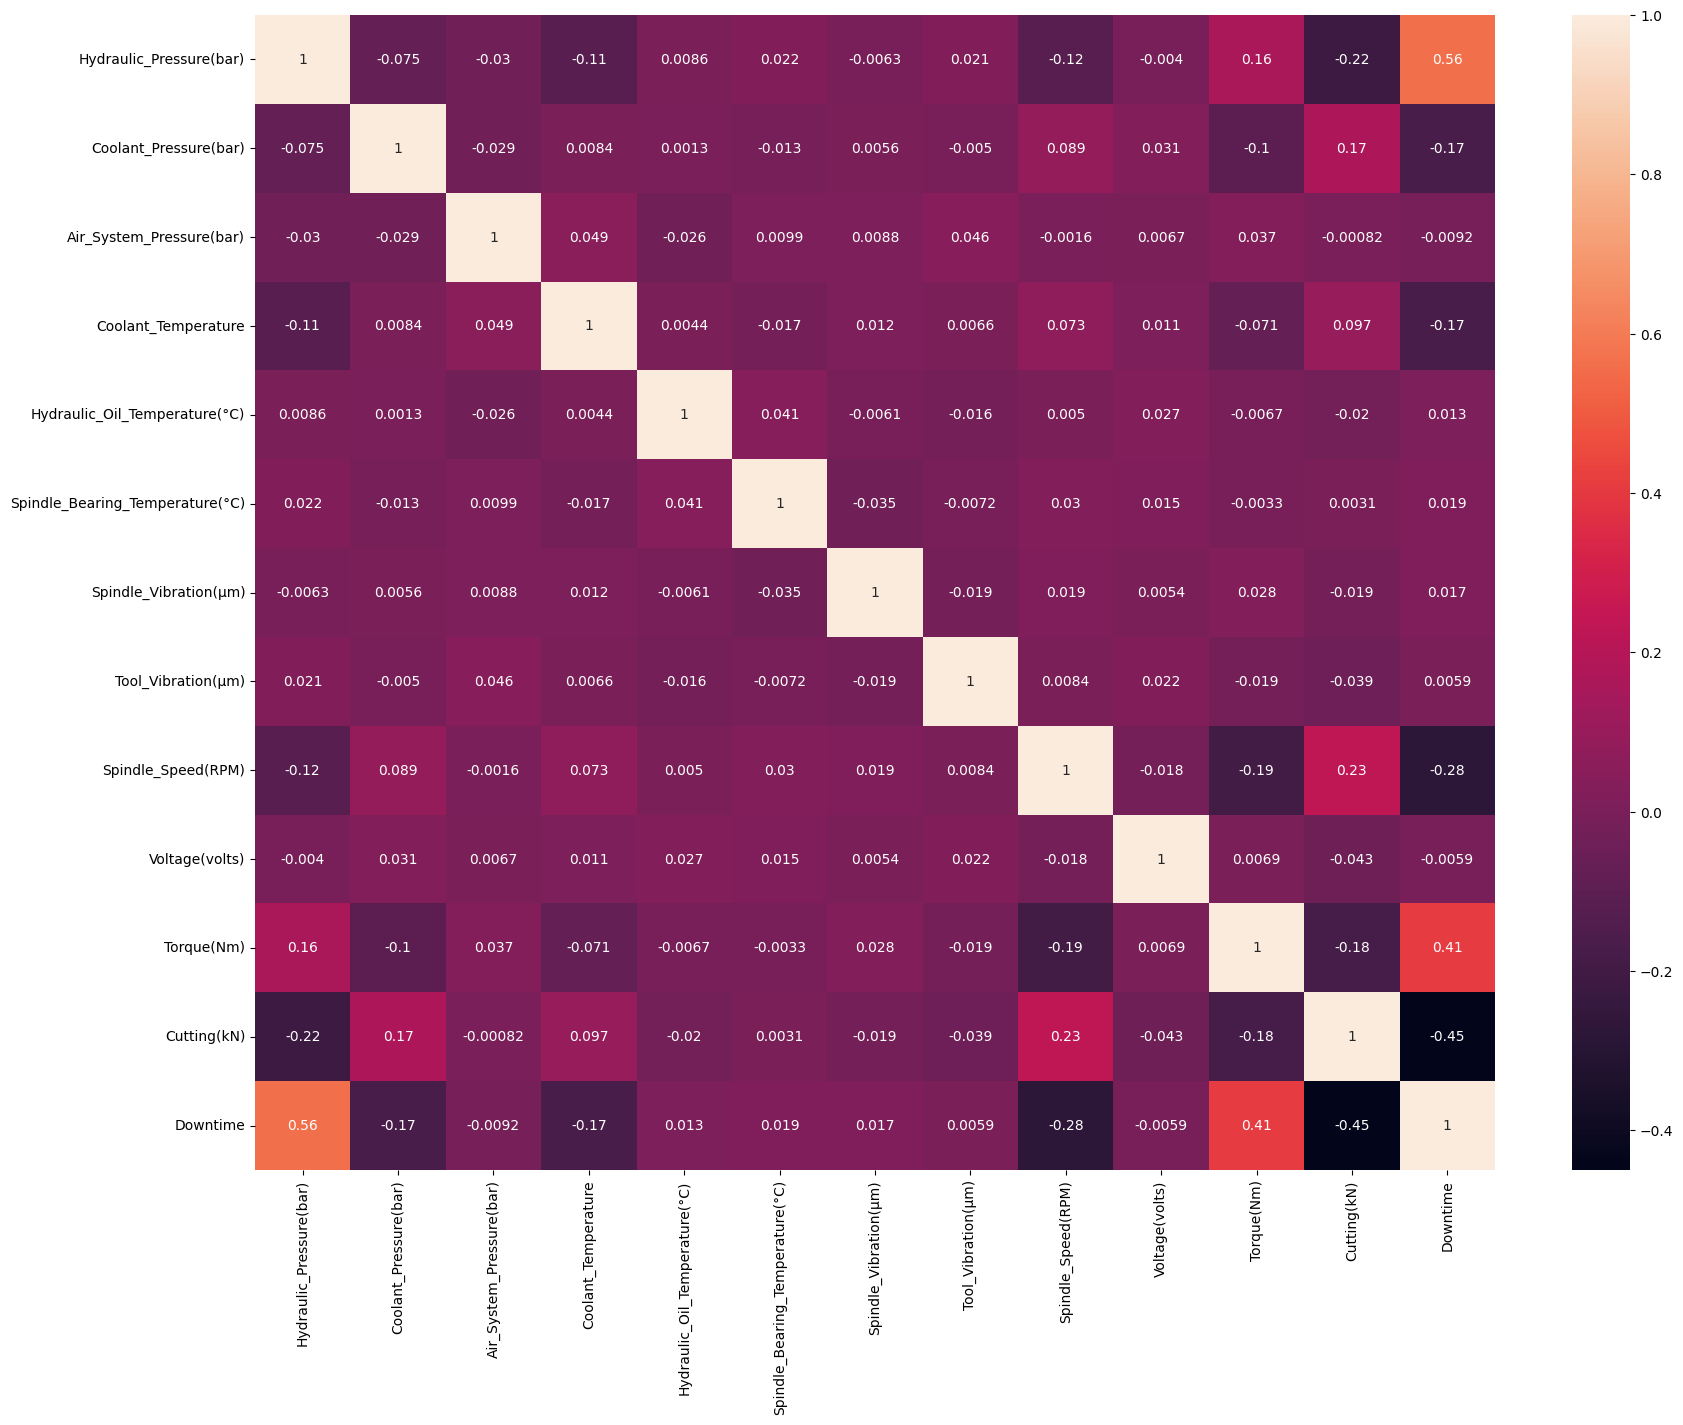

In [ ]:
# correlation map
plt.figure(figsize=(20, 15))
sns.heatmap(df[numeric_columns].corr(),annot=True)
plt.show()

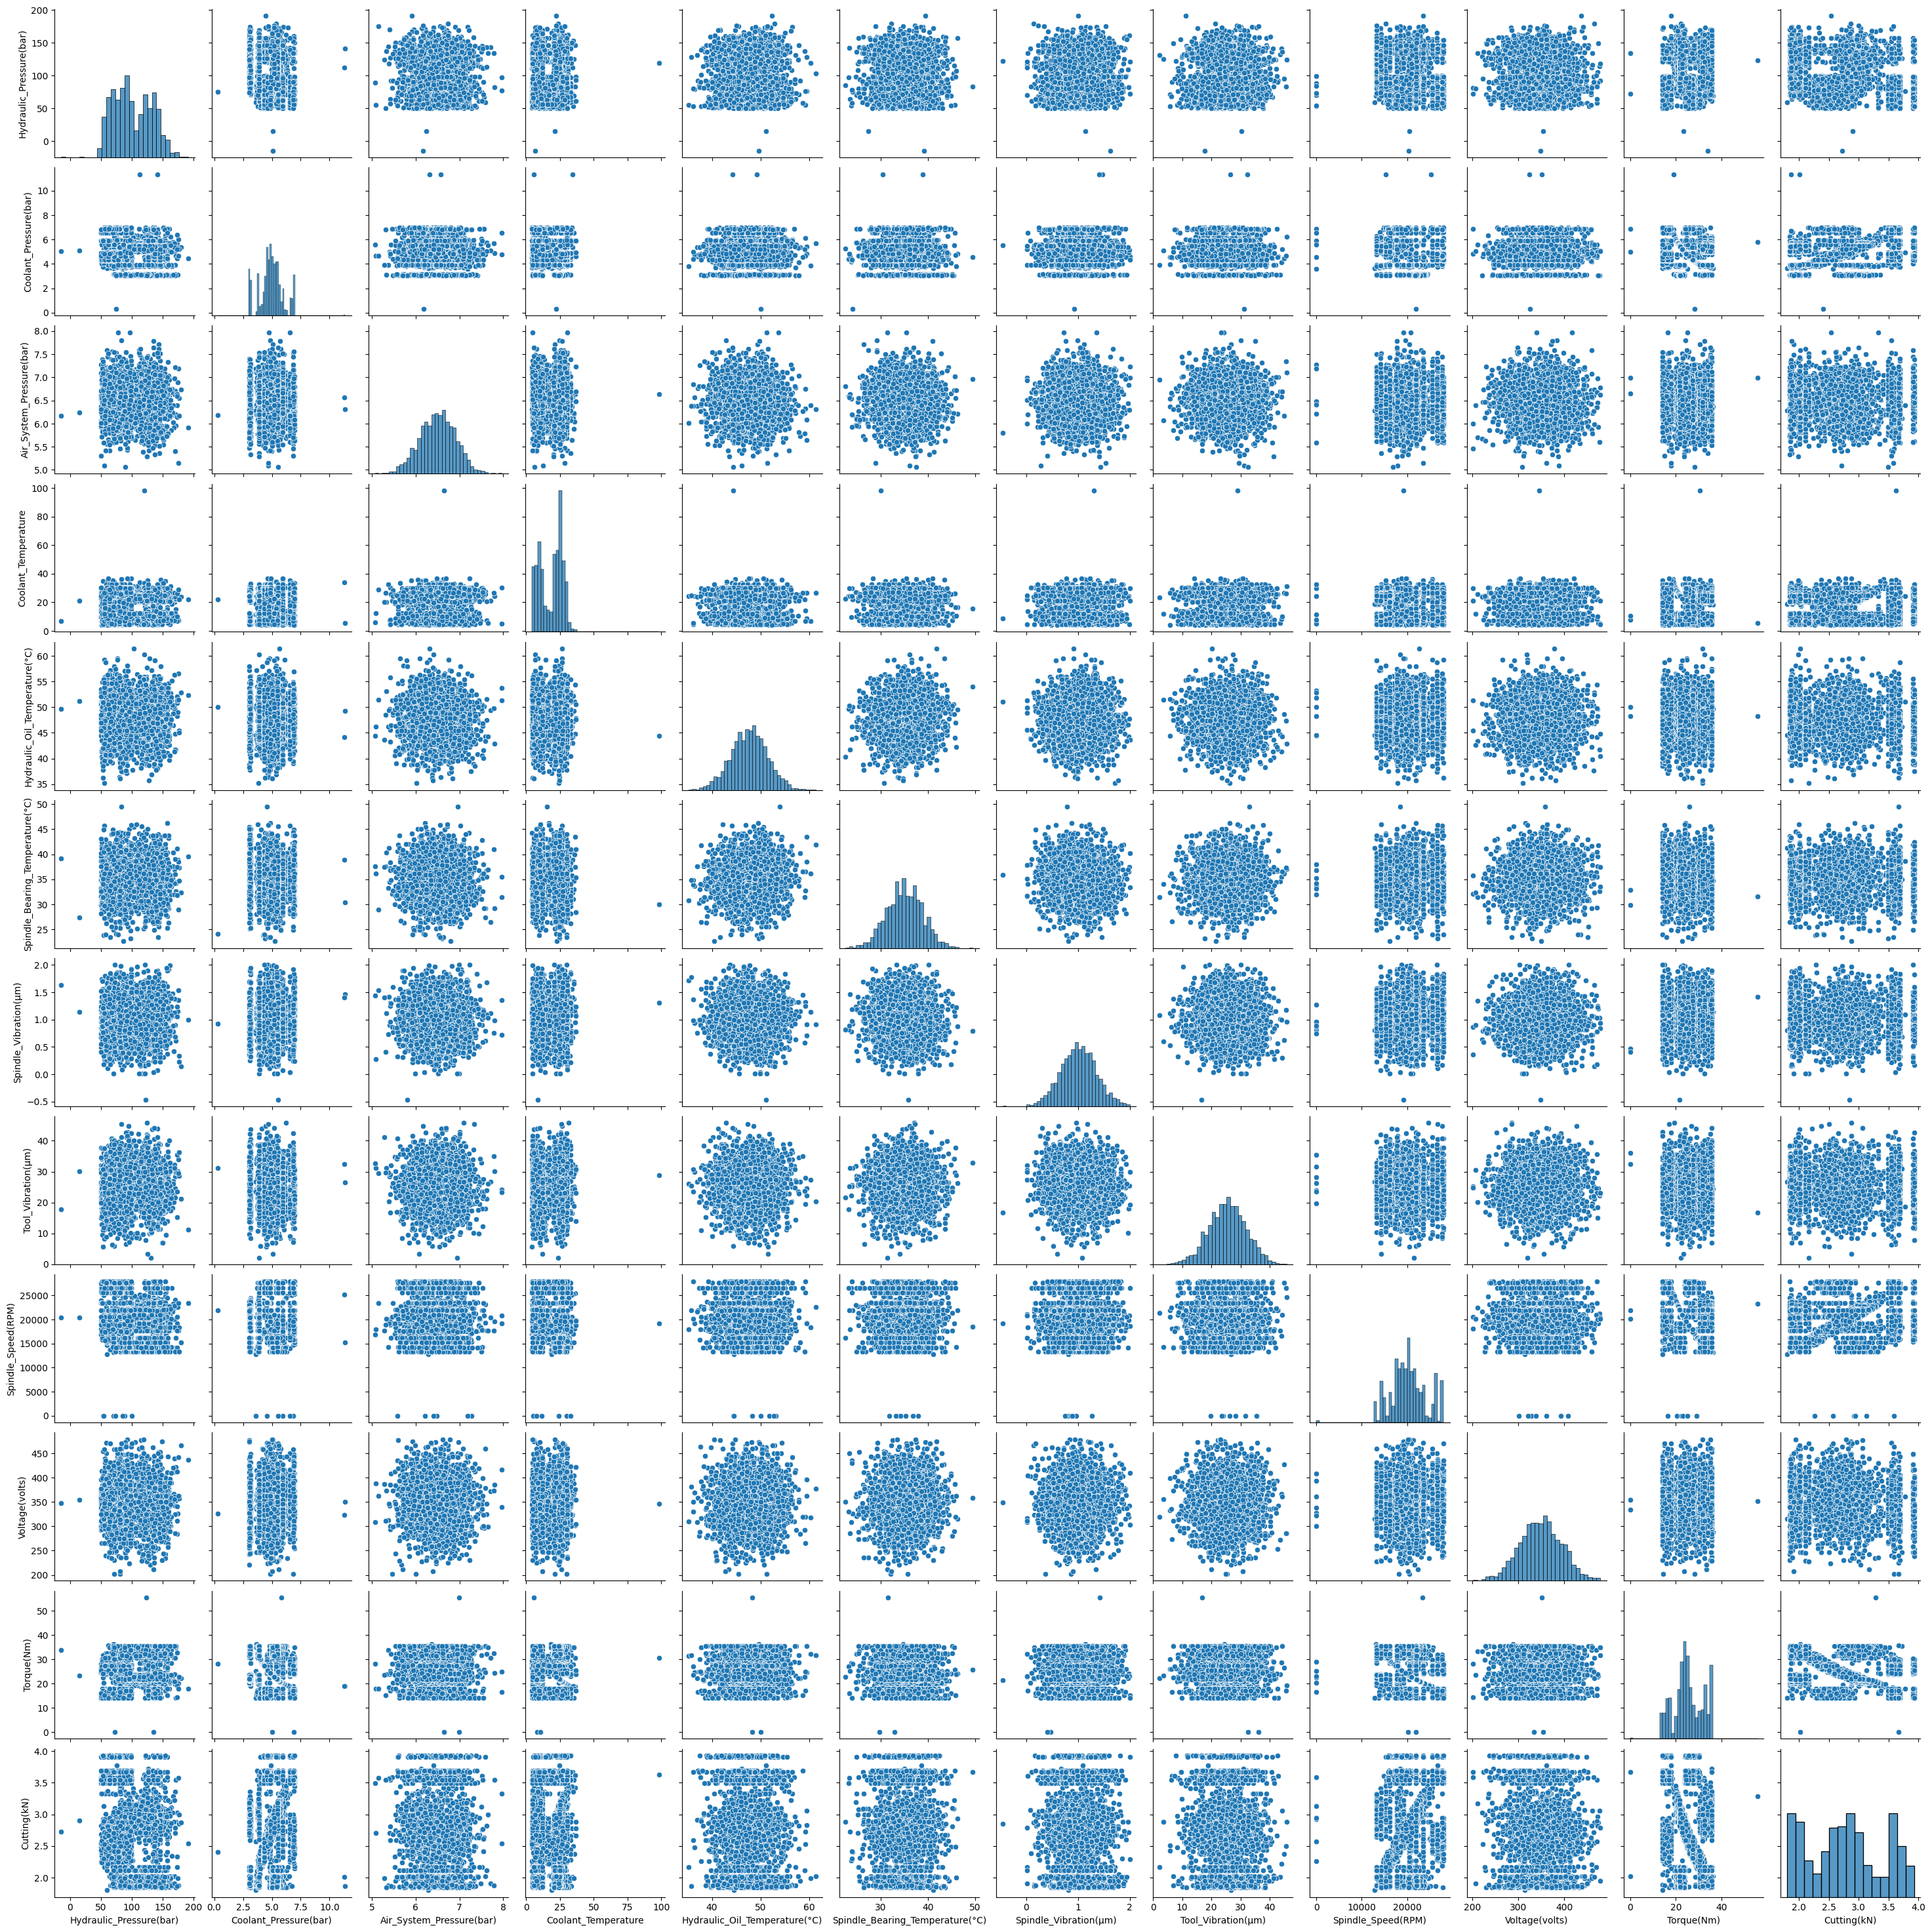

In [ ]:
sns.pairplot(df)


Observations:
For a specific time period, the spindle speed shows a sudden fall off which indicates machine downtime during that period.
There is a strong correlation between Hydraulic pressure and Torque with the downtime.Also cutting has a negative correlation with the downtime.

##Data preprocessing

In [ ]:
# creating a copy of the df
df_copy=df.copy()

In [ ]:
# checking for duplicates
df_copy.duplicated().sum()

0

###Removing the null values

In [ ]:
# checking for null values
df_copy.isnull().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(°C)      16
Spindle_Bearing_Temperature(°C)     7
Spindle_Vibration(µm)              11
Tool_Vibration(µm)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [ ]:
# creating a list of columns that contains null values except the column Cutting
null_val = [col for col in df_copy.columns if df_copy[col].isnull().any() and col != 'Cutting(kN)']

In [ ]:
null_val

['Hydraulic_Pressure(bar)',
 'Coolant_Pressure(bar)',
 'Air_System_Pressure(bar)',
 'Coolant_Temperature',
 'Hydraulic_Oil_Temperature(°C)',
 'Spindle_Bearing_Temperature(°C)',
 'Spindle_Vibration(µm)',
 'Tool_Vibration(µm)',
 'Spindle_Speed(RPM)',
 'Voltage(volts)',
 'Torque(Nm)']

In [ ]:
# applying the median imputation method for removing the null values as the columns contain outliers
for col in null_val:
  med=df_copy[col].median()
  df_copy[col]=df_copy[col].fillna(med)

In [ ]:
# checking for null values
df_copy.isnull().sum()

Date                               0
Machine_ID                         0
Assembly_Line_No                   0
Hydraulic_Pressure(bar)            0
Coolant_Pressure(bar)              0
Air_System_Pressure(bar)           0
Coolant_Temperature                0
Hydraulic_Oil_Temperature(°C)      0
Spindle_Bearing_Temperature(°C)    0
Spindle_Vibration(µm)              0
Tool_Vibration(µm)                 0
Spindle_Speed(RPM)                 0
Voltage(volts)                     0
Torque(Nm)                         0
Cutting(kN)                        7
Downtime                           0
dtype: int64

In [ ]:
 # applying the mean imputation method for removing the null values as the column contains  no outliers
mean_cut=df_copy['Cutting(kN)'].mean()
df_copy['Cutting(kN)']=df_copy['Cutting(kN)'].fillna(mean_cut)

In [ ]:
# checking for null values
df_copy.isnull().sum()

Date                               0
Machine_ID                         0
Assembly_Line_No                   0
Hydraulic_Pressure(bar)            0
Coolant_Pressure(bar)              0
Air_System_Pressure(bar)           0
Coolant_Temperature                0
Hydraulic_Oil_Temperature(°C)      0
Spindle_Bearing_Temperature(°C)    0
Spindle_Vibration(µm)              0
Tool_Vibration(µm)                 0
Spindle_Speed(RPM)                 0
Voltage(volts)                     0
Torque(Nm)                         0
Cutting(kN)                        0
Downtime                           0
dtype: int64

###Removing the outliers

In [ ]:
# Apply winsorization
# Here we are winsorizing the top and bottom 10% of the data
for col in null_val:
   df_copy[col]=mstats.winsorize(df_copy[col], limits=[0.1, 0.1])

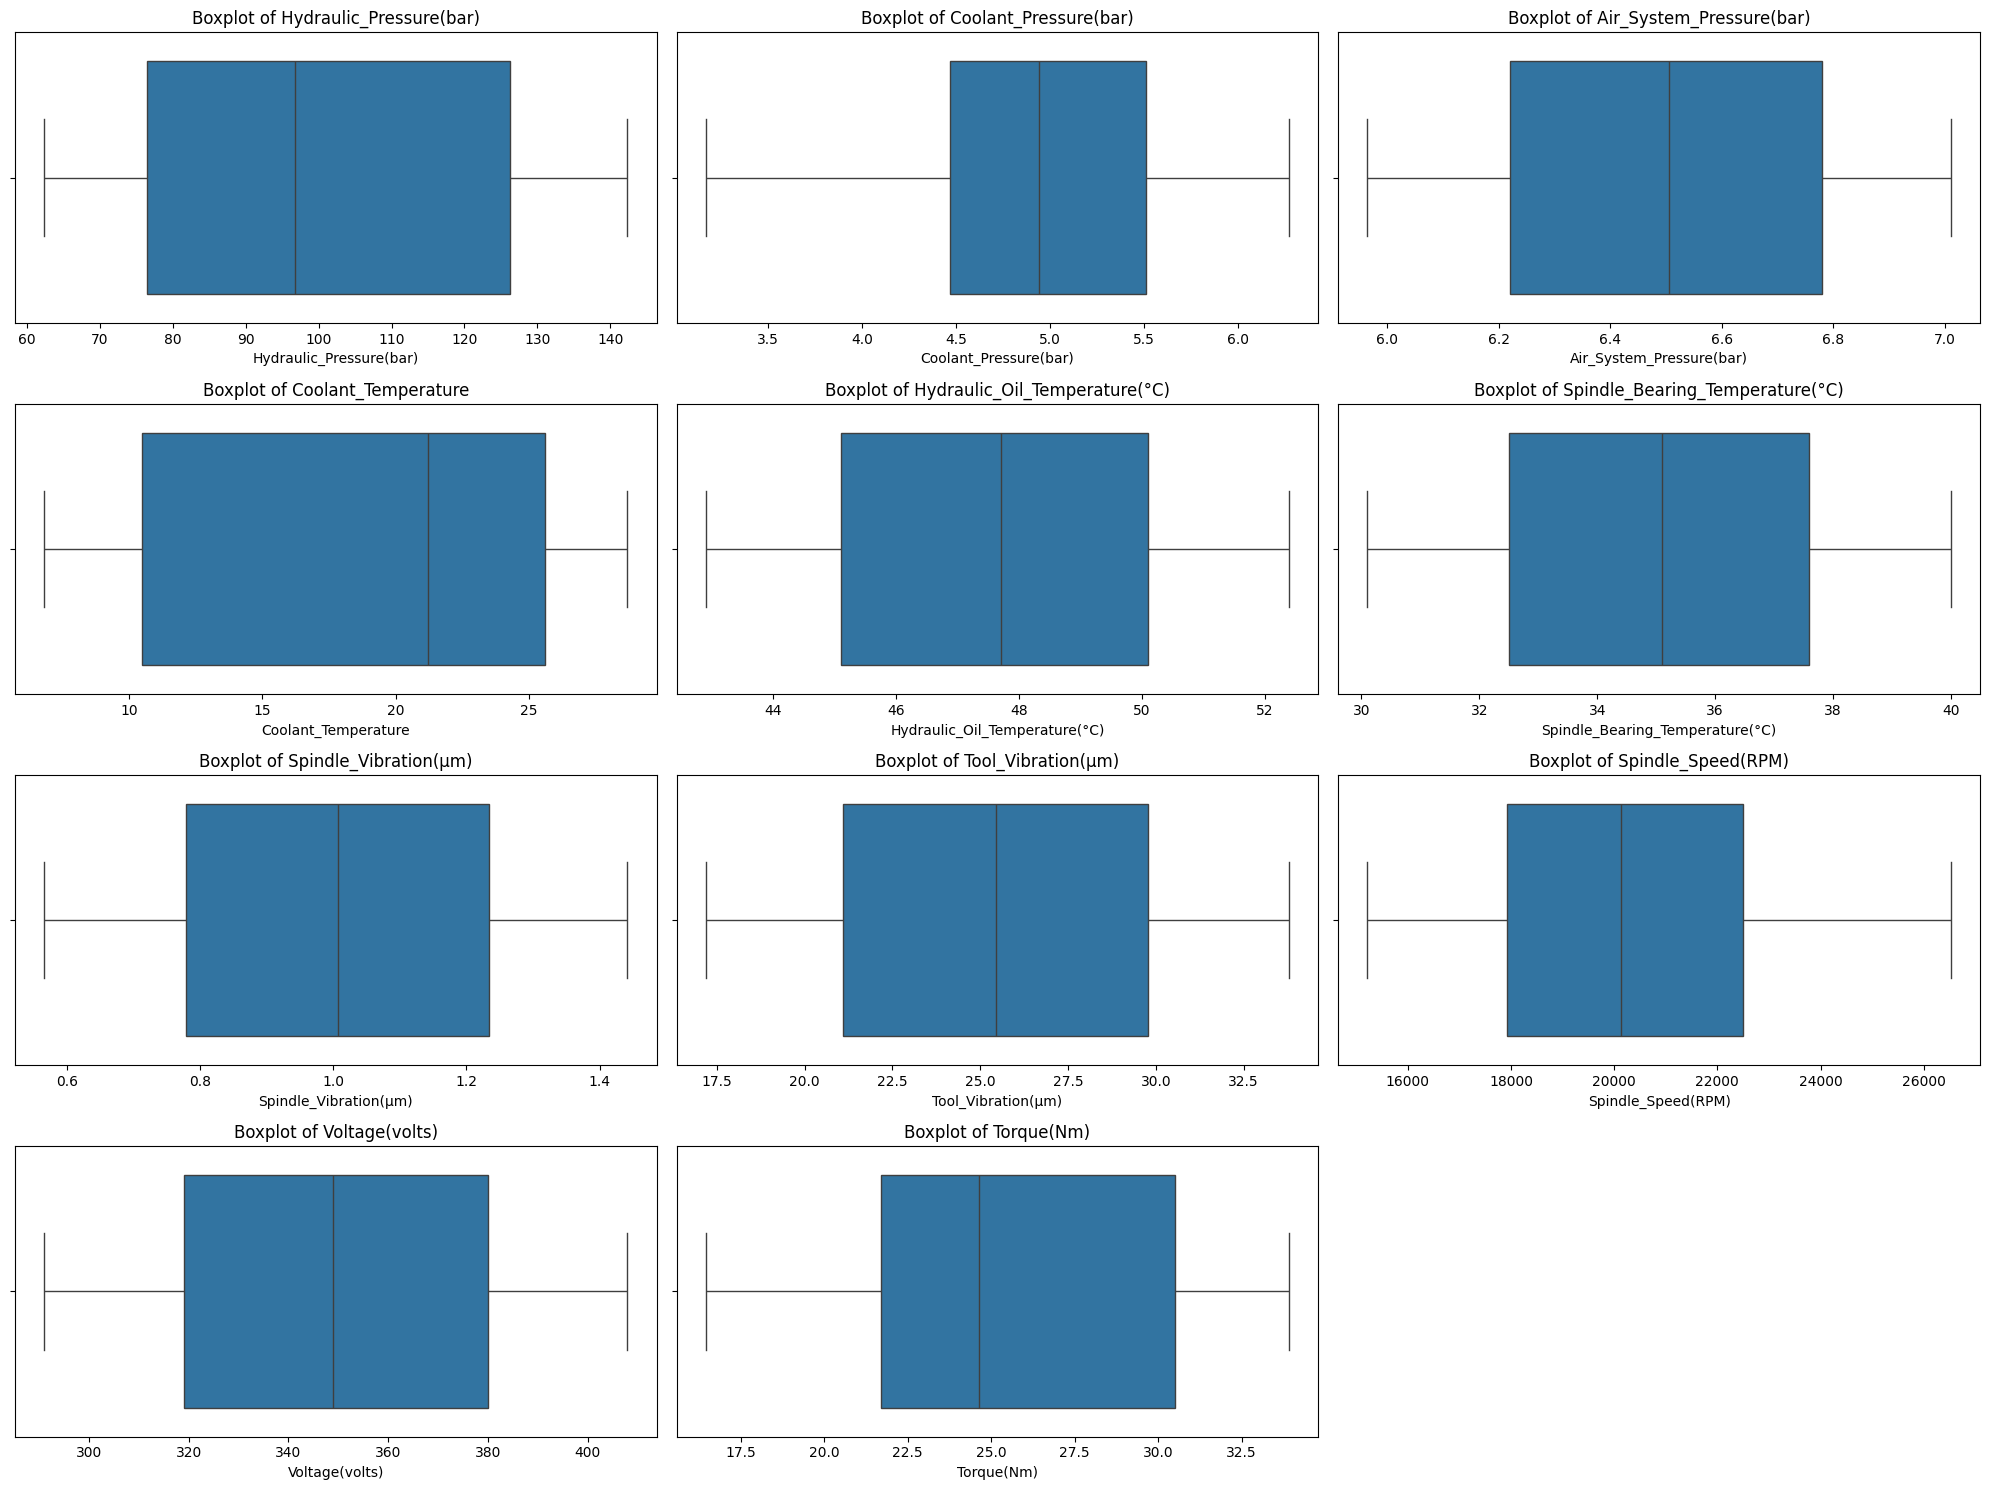

In [ ]:
# plotting the box plot for checking outliers after the winsorization
plt.figure(figsize=(20, 15))
for i, col in enumerate(null_val):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df_copy[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

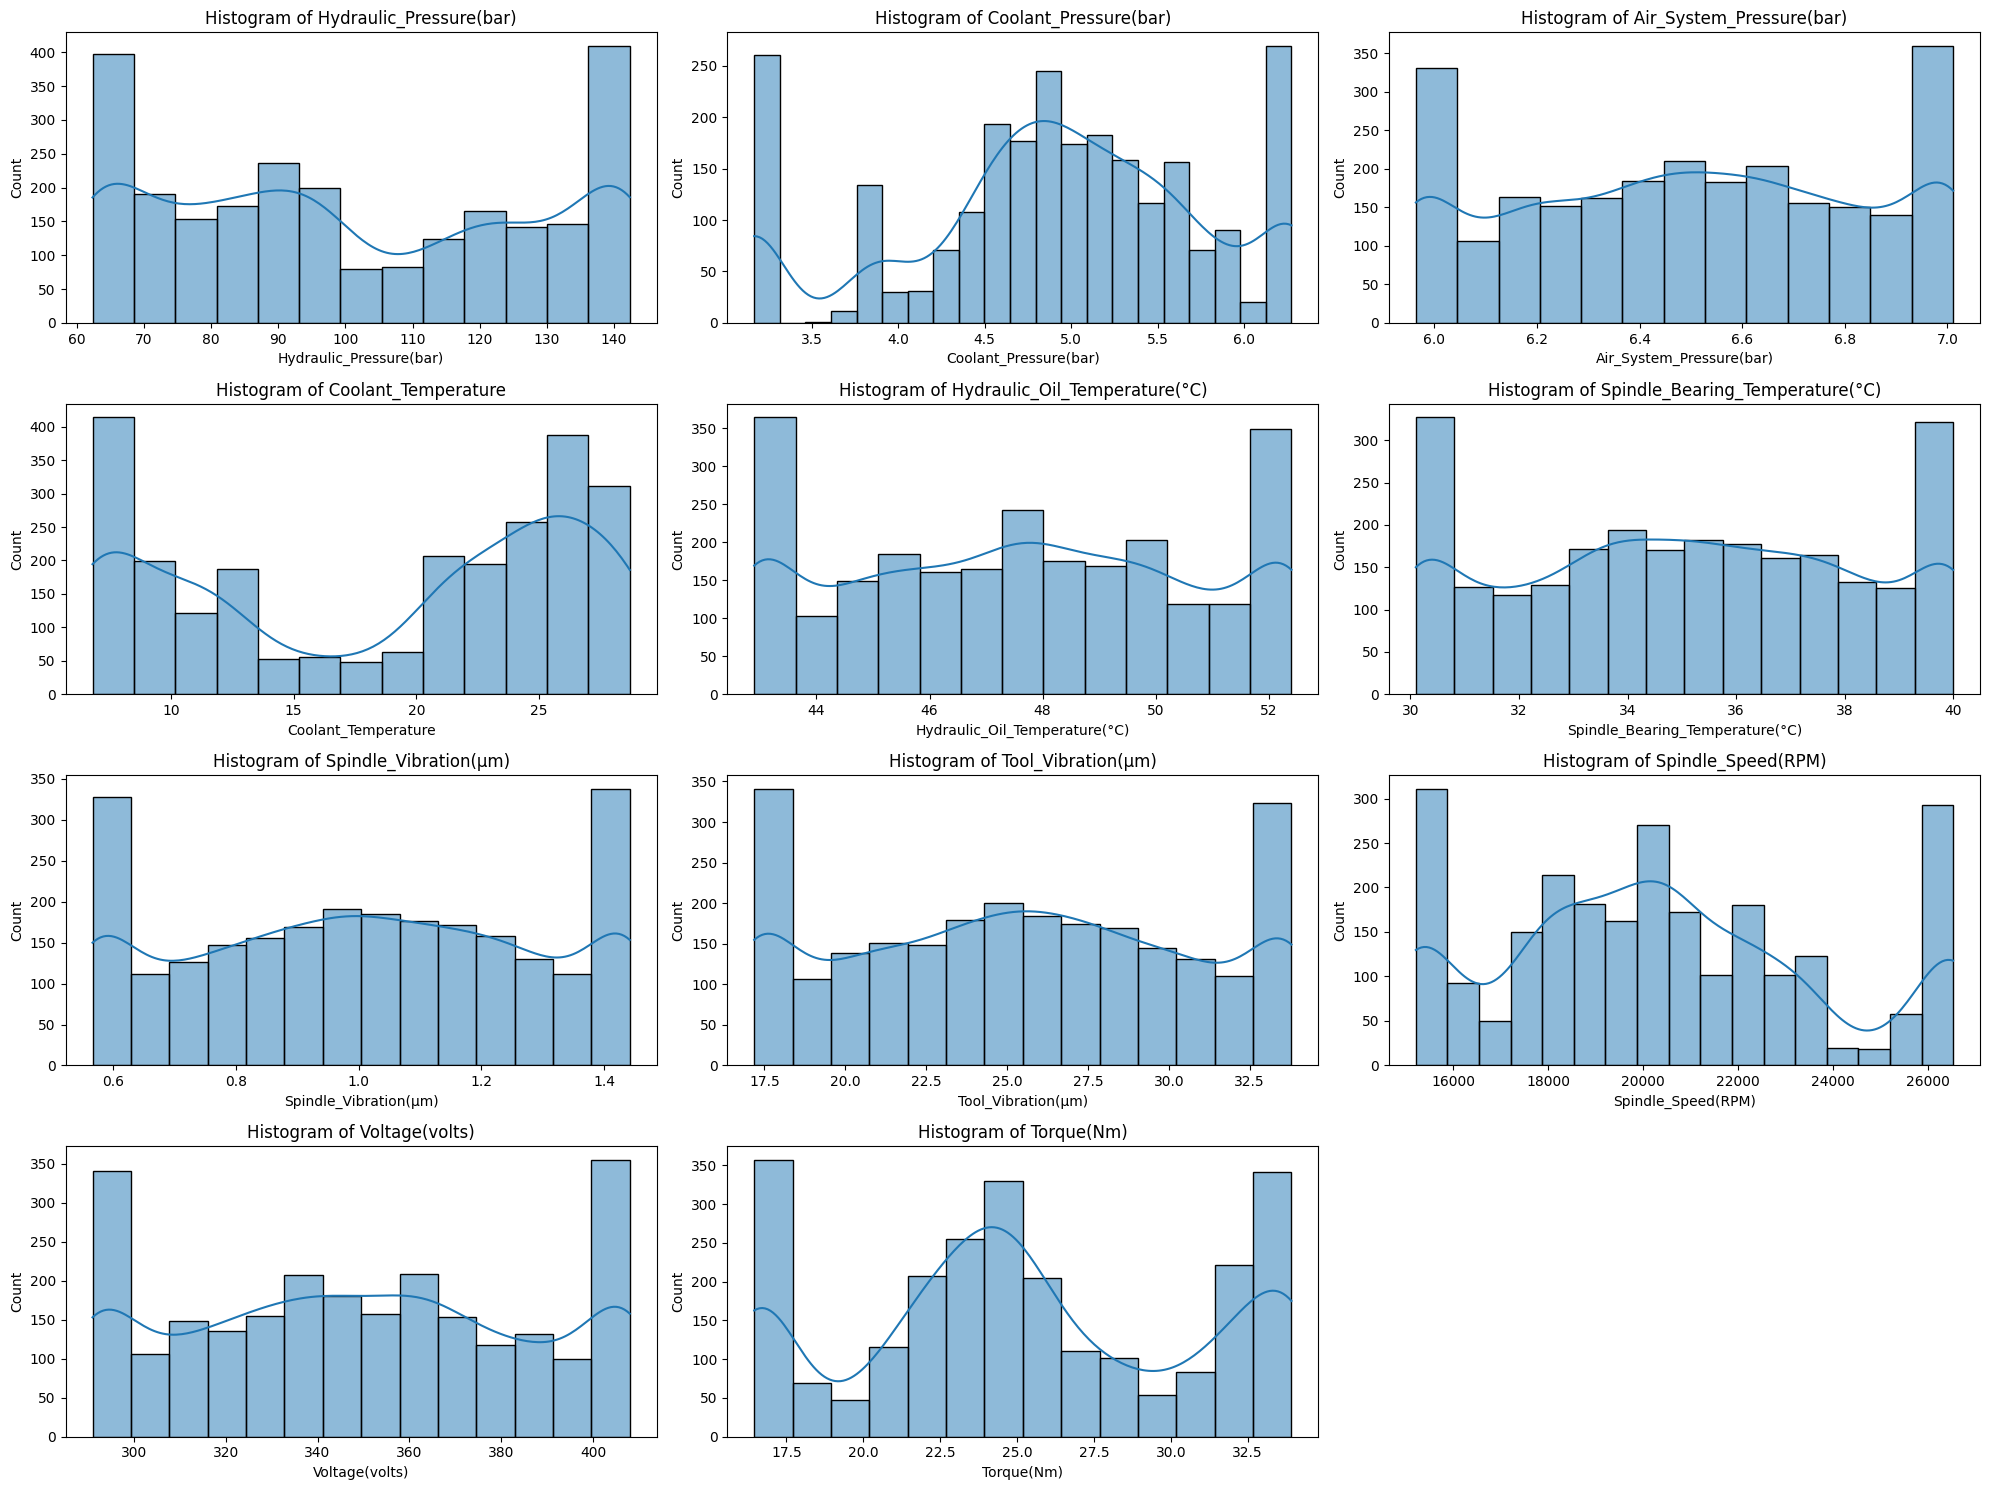

In [ ]:
# plotting the histogram  after the winsorization
plt.figure(figsize=(20, 15))
for i, col in enumerate(null_val):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df_copy[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Observations:

All the columns except Cutting contains outliers. So we are using the median imputatiion method for removing the null values. For the column 'Cutting' we use the mean imputation method. For the outlier removal we use winsorization method. After applying the winsorization method, we can see all the plots are normally distributed.


Statistical insights:

In the line plot, there's a noticeable sharp drop towards the end of the time period, where the spindle speed drops to 0 RPM.High variability can be observed on specific dates, indicating potential issues or changes in operating conditions during those times.

In the scatter plot,there are some outliers where Coolant Pressure is above 10 bar and Hydraulic Pressure exceeds 200 bar. The presence of these outliers could indicate anomalies or errors in the data collection process.

Correlation:

Hydraulic Pressure (bar) and Downtime: There's a strong positive correlation (0.56), indicating that higher hydraulic pressure is associated with increased downtime.
Torque (Nm) and Downtime: A positive correlation (0.41) suggests that higher torque is also associated with more downtime.
Cutting (kN) and Downtime: A moderate negative correlation (-0.45) suggests that higher cutting force is associated with reduced downtime.
Spindle Speed (RPM) and Downtime: A negative correlation (-0.28) suggests that higher spindle speeds are associated with less downtime.

Business Insights:

From the line plot it is clear that the sharp drop to 0 RPM towards the end of the period could indicate a machine shutdown, maintenance, or a malfunction. Immediate investigation is necessary to prevent potential downtime and operational disruptions.

Consistent spindle speeds within the desired range suggest efficient machine operations. Ensuring that the spindle speed remains within this range can lead to improved machining quality and productivity.Any deviations or trends towards lower spindle speeds might indicate a need for adjustments in operational settings or machine parameters.

Since most of the data points are clustered within specific ranges, it’s crucial to monitor the parameters within these ranges to ensure smooth operation. Deviations from these ranges might indicate potential issues.

Focus on managing hydraulic pressure as it has a strong impact on downtime. Consider maintaining optimal pressure levels to reduce downtime.
Monitor torque levels, as high torque is also linked to increased downtime. Ensure torque levels are within optimal ranges to minimize machine downtime.

Balance the cutting force to avoid increased downtime.
